In [153]:
from typing import Annotated
import gradio as gr
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from loguru import logger
from pydantic import BaseModel

In [154]:
load_dotenv(verbose=True)

True

## Step-1: Define the State object

In [155]:
class State(BaseModel):
    messages: Annotated[list, add_messages]

## Step-2: Start Graph Builder with the State

In [156]:
graph_builder = StateGraph(State)
llm = ChatOpenAI(model="gpt-4o-mini")

## Step 3: Create Nodes

In [157]:
def chatbot_node(old_state: State) -> State:
    logger.info(old_state)
    response = llm.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state

In [158]:
graph_builder.add_node("chatbot", chatbot_node)

## Step-4: Create Edge 

In [159]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

## Step-5: Compile the Graph

In [160]:
graph = graph_builder.compile()

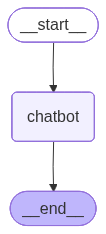

In [161]:
graph

# Let's do chat with Gradio

In [162]:
def chat(user_input: str, history):
    initial_state = State(messages=[{"role": "user", "content": user_input}])
    result = graph.invoke(initial_state)
    return result['messages'][-1].content

# âœ… Add .queue() before launching
gr.ChatInterface(chat, type="messages").queue().launch()

* Running on local URL:  http://127.0.0.1:7871

To create a public link, set `share=True` in `launch()`.


2025-10-25 12:00:40.829 | INFO     | __main__:chatbot_node:2 - messages=[HumanMessage(content='sdfsf', additional_kwargs={}, response_metadata={}, id='fcd38f76-7b78-4705-9081-27a0c988c1e5')]
2025-10-25 12:01:04.636 | INFO     | __main__:chatbot_node:2 - messages=[HumanMessage(content='explain how to call spring boot ', additional_kwargs={}, response_metadata={}, id='5babfde6-e87c-498c-8a4e-106ced7b0ef2')]
